In [1]:
from typing import Tuple, Union, List

import numpy as np

from numpy.typing import NDArray

import torch

from torch.optim import Adam

from trainer import train


def get_optimal_lr(
    training_params,
    lr_list: List[float],
) -> Tuple[float, NDArray]:
    """
    Runs experiments to determine the best learning rate for a given model and trainer.

    Parameters:
    training_params (dict): A dictionary containing the training parameters.
                            It should include the model, the number of epochs,
                            and placeholders for training and validation losses.
    lr_list (List[float]): A list of learning rates to test.

    Returns:
    Tuple[np.ndarray, np.ndarray]: A tuple containing two numpy arrays.
                                   The first array tracks the training loss for each learning rate and epoch.
                                   The second array tracks the validation loss for each learning rate and epoch.
    """

    # define loss tracker
    epochs = training_params["epochs"]
    train_loss_tracker = np.zeros((len(lr_list), epochs)) + 1000.0
    valid_loss_tracker = np.zeros((len(lr_list), epochs)) + 1000.0

    for idx, lr in enumerate(lr_list):
        training_params["training_losses"] = train_loss_tracker[idx, :]
        training_params["validation_losses"] = valid_loss_tracker[idx, :]
        training_params["model"].initialize_weights()
        training_params["optimizer"] = Adam(
            training_params["model"].parameters(), lr=lr
        )

        train(**training_params)

    return train_loss_tracker, valid_loss_tracker

In [2]:
import utils

dataset = utils.StereoDataset(
    imgs_path="environment-walking",
    depth_path="environment-walking-depth",
    img_size=64
)

trainloader, validloader, testloader = utils.get_train_valid_test_loaders(
    dataset, batchsize=16, split=(0.75, 0.1, 0.15)
)

In [3]:
SAMPLE_BATCHES = 3

trainloaders = []
validloaders = []
testloaders = []

for i in range(SAMPLE_BATCHES):
    trainloaders.append(next(iter(trainloader)))
    validloaders.append(next(iter(validloader)))
    testloaders.append(next(iter(testloader)))

In [4]:
from criterions import DepthLoss

from models import DepthNet

model = DepthNet(4, use_transpose_conv=True)
criterion = DepthLoss()

inputs = {
    "model": model,
    "criterion": criterion,
    # "optimizer": optimizer,
    "trainloader": trainloader,
    "validloader": validloader,
    "epochs": 20,
    "device": "cuda",
    "verbose":False,
    # "scheduler": ReduceLROnPlateau(optimizer, patience=5, verbose=True),
    # "training_losses": [],
    # "validation_losses": [],
    # "pretrained_model":"best_model_log_mse.pth"
}

In [5]:
training_loss_tracker, valid_loss_tracker = get_optimal_lr(inputs, [1e-4, 1e-3, 1e-2, 1e-1, 1])

Training on cuda...


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]


Epoch: 1/20.. Training Loss: 0.081876.. Validation Loss: 0.037501
loss decreased from inf to 0.037501 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]


Epoch: 2/20.. Training Loss: 0.035963.. Validation Loss: 0.044684


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


Epoch: 3/20.. Training Loss: 0.028298.. Validation Loss: 0.035228
loss decreased from 0.037501 to 0.035228 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]


Epoch: 4/20.. Training Loss: 0.026321.. Validation Loss: 0.038472


Validating: 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]


Epoch: 5/20.. Training Loss: 0.026739.. Validation Loss: 0.023490
loss decreased from 0.035228 to 0.023490 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]


Epoch: 6/20.. Training Loss: 0.023467.. Validation Loss: 0.033407


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]


Epoch: 7/20.. Training Loss: 0.023045.. Validation Loss: 0.030232


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


Epoch: 8/20.. Training Loss: 0.019662.. Validation Loss: 0.022422
loss decreased from 0.023490 to 0.022422 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


Epoch: 9/20.. Training Loss: 0.021258.. Validation Loss: 0.037442


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


Epoch: 10/20.. Training Loss: 0.020815.. Validation Loss: 0.025881


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]


Epoch: 11/20.. Training Loss: 0.018662.. Validation Loss: 0.018111
loss decreased from 0.022422 to 0.018111 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]


Epoch: 12/20.. Training Loss: 0.018187.. Validation Loss: 0.020004


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]


Epoch: 13/20.. Training Loss: 0.017839.. Validation Loss: 0.018339


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]


Epoch: 14/20.. Training Loss: 0.017079.. Validation Loss: 0.021014


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


Epoch: 15/20.. Training Loss: 0.016748.. Validation Loss: 0.019235


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]


Epoch: 16/20.. Training Loss: 0.016698.. Validation Loss: 0.020969


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


Epoch: 17/20.. Training Loss: 0.016365.. Validation Loss: 0.018023
loss decreased from 0.018111 to 0.018023 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]


Epoch: 18/20.. Training Loss: 0.017801.. Validation Loss: 0.018397


Validating: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]


Epoch: 19/20.. Training Loss: 0.016291.. Validation Loss: 0.015418
loss decreased from 0.018023 to 0.015418 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]


Epoch: 20/20.. Training Loss: 0.015842.. Validation Loss: 0.020481
Training on cuda...


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


Epoch: 1/20.. Training Loss: 0.080433.. Validation Loss: 0.026539
loss decreased from inf to 0.026539 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]


Epoch: 2/20.. Training Loss: 0.030458.. Validation Loss: 0.032180


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


Epoch: 3/20.. Training Loss: 0.031738.. Validation Loss: 0.043903


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]


Epoch: 4/20.. Training Loss: 0.025077.. Validation Loss: 0.031087


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]


Epoch: 5/20.. Training Loss: 0.021539.. Validation Loss: 0.027590


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]


Epoch: 6/20.. Training Loss: 0.020480.. Validation Loss: 0.016768
loss decreased from 0.026539 to 0.016768 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


Epoch: 7/20.. Training Loss: 0.023862.. Validation Loss: 0.020956


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]


Epoch: 8/20.. Training Loss: 0.019153.. Validation Loss: 0.023775


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]


Epoch: 9/20.. Training Loss: 0.020519.. Validation Loss: 0.021911


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]


Epoch: 10/20.. Training Loss: 0.017820.. Validation Loss: 0.029090


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]


Epoch: 11/20.. Training Loss: 0.016628.. Validation Loss: 0.013675
loss decreased from 0.016768 to 0.013675 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]


Epoch: 12/20.. Training Loss: 0.017599.. Validation Loss: 0.019932


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


Epoch: 13/20.. Training Loss: 0.014989.. Validation Loss: 0.019026


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.17it/s]


Epoch: 14/20.. Training Loss: 0.018091.. Validation Loss: 0.019414


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]


Epoch: 15/20.. Training Loss: 0.015650.. Validation Loss: 0.025134


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]


Epoch: 16/20.. Training Loss: 0.016662.. Validation Loss: 0.015999


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]


Epoch: 17/20.. Training Loss: 0.014611.. Validation Loss: 0.015012


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]


Epoch: 18/20.. Training Loss: 0.014392.. Validation Loss: 0.012430
loss decreased from 0.013675 to 0.012430 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]


Epoch: 19/20.. Training Loss: 0.013412.. Validation Loss: 0.010797
loss decreased from 0.012430 to 0.010797 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]


Epoch: 20/20.. Training Loss: 0.014175.. Validation Loss: 0.017942
Training on cuda...


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


Epoch: 1/20.. Training Loss: 0.273887.. Validation Loss: 0.064484
loss decreased from inf to 0.064484 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]


Epoch: 2/20.. Training Loss: 0.065314.. Validation Loss: 0.048047
loss decreased from 0.064484 to 0.048047 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]


Epoch: 3/20.. Training Loss: 0.065605.. Validation Loss: 0.055563


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


Epoch: 4/20.. Training Loss: 0.058104.. Validation Loss: 0.055407


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]


Epoch: 5/20.. Training Loss: 0.059070.. Validation Loss: 0.047296
loss decreased from 0.048047 to 0.047296 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]


Epoch: 6/20.. Training Loss: 0.052780.. Validation Loss: 0.046669
loss decreased from 0.047296 to 0.046669 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]


Epoch: 7/20.. Training Loss: 0.053905.. Validation Loss: 0.044706
loss decreased from 0.046669 to 0.044706 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]


Epoch: 8/20.. Training Loss: 0.033724.. Validation Loss: 0.026947
loss decreased from 0.044706 to 0.026947 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


Epoch: 9/20.. Training Loss: 0.027001.. Validation Loss: 0.041758


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]


Epoch: 10/20.. Training Loss: 0.022733.. Validation Loss: 0.039093


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]


Epoch: 11/20.. Training Loss: 0.022541.. Validation Loss: 0.019072
loss decreased from 0.026947 to 0.019072 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]


Epoch: 12/20.. Training Loss: 0.021464.. Validation Loss: 0.112776


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]


Epoch: 13/20.. Training Loss: 0.021857.. Validation Loss: 0.026415


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]


Epoch: 14/20.. Training Loss: 0.019101.. Validation Loss: 0.034132


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]


Epoch: 15/20.. Training Loss: 0.019569.. Validation Loss: 0.030585


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]


Epoch: 16/20.. Training Loss: 0.017374.. Validation Loss: 0.012342
loss decreased from 0.019072 to 0.012342 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]


Epoch: 17/20.. Training Loss: 0.015619.. Validation Loss: 0.013095


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]


Epoch: 18/20.. Training Loss: 0.019185.. Validation Loss: 0.012716


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]


Epoch: 19/20.. Training Loss: 0.018605.. Validation Loss: 0.021738


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]


Epoch: 20/20.. Training Loss: 0.015644.. Validation Loss: 0.016112
Training on cuda...


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]


Epoch: 1/20.. Training Loss: 0.250657.. Validation Loss: 0.122840
loss decreased from inf to 0.122840 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]


Epoch: 2/20.. Training Loss: 0.092778.. Validation Loss: 0.073783
loss decreased from 0.122840 to 0.073783 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]


Epoch: 3/20.. Training Loss: 0.092820.. Validation Loss: 0.094530


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]


Epoch: 4/20.. Training Loss: 0.075301.. Validation Loss: 0.065614
loss decreased from 0.073783 to 0.065614 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]


Epoch: 5/20.. Training Loss: 0.072899.. Validation Loss: 0.078724


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]


Epoch: 6/20.. Training Loss: 0.073541.. Validation Loss: 0.057427
loss decreased from 0.065614 to 0.057427 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


Epoch: 7/20.. Training Loss: 0.071255.. Validation Loss: 0.077317


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


Epoch: 8/20.. Training Loss: 0.071271.. Validation Loss: 0.053511
loss decreased from 0.057427 to 0.053511 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]


Epoch: 9/20.. Training Loss: 0.066493.. Validation Loss: 0.062900


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


Epoch: 10/20.. Training Loss: 0.069839.. Validation Loss: 0.116303


Validating: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]


Epoch: 11/20.. Training Loss: 0.073742.. Validation Loss: 0.073436


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


Epoch: 12/20.. Training Loss: 0.068042.. Validation Loss: 0.048964
loss decreased from 0.053511 to 0.048964 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]


Epoch: 13/20.. Training Loss: 0.064352.. Validation Loss: 0.069110


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]


Epoch: 14/20.. Training Loss: 0.062571.. Validation Loss: 0.056977


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]


Epoch: 15/20.. Training Loss: 0.067144.. Validation Loss: 0.067013


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]


Epoch: 16/20.. Training Loss: 0.067414.. Validation Loss: 0.060951


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]


Epoch: 17/20.. Training Loss: 0.063494.. Validation Loss: 0.051566


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]


Epoch: 18/20.. Training Loss: 0.074936.. Validation Loss: 0.054275


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


Epoch: 19/20.. Training Loss: 0.068947.. Validation Loss: 0.080026


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.03it/s]


Epoch: 20/20.. Training Loss: 0.068532.. Validation Loss: 0.055573
Training on cuda...


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]


Epoch: 1/20.. Training Loss: 15.746724.. Validation Loss: 0.812838
loss decreased from inf to 0.812838 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]


Epoch: 2/20.. Training Loss: 1.343331.. Validation Loss: 0.816110


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]


Epoch: 3/20.. Training Loss: 0.768634.. Validation Loss: 0.813412


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]


Epoch: 4/20.. Training Loss: 0.768785.. Validation Loss: 0.814667


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


Epoch: 5/20.. Training Loss: 0.768763.. Validation Loss: 0.812232
loss decreased from 0.812838 to 0.812232 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


Epoch: 6/20.. Training Loss: 0.769473.. Validation Loss: 0.812313


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]


Epoch: 7/20.. Training Loss: 0.769339.. Validation Loss: 0.814964


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]


Epoch: 8/20.. Training Loss: 0.768889.. Validation Loss: 0.816490


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]


Epoch: 9/20.. Training Loss: 0.768605.. Validation Loss: 0.812624


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]


Epoch: 10/20.. Training Loss: 0.768211.. Validation Loss: 0.813988


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]


Epoch: 11/20.. Training Loss: 0.768224.. Validation Loss: 0.812156
loss decreased from 0.812232 to 0.812156 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]


Epoch: 12/20.. Training Loss: 0.769045.. Validation Loss: 0.816600


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]


Epoch: 13/20.. Training Loss: 0.768948.. Validation Loss: 0.813604


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


Epoch: 14/20.. Training Loss: 0.768531.. Validation Loss: 0.814312


Validating: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]


Epoch: 15/20.. Training Loss: 0.768381.. Validation Loss: 0.813358


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


Epoch: 16/20.. Training Loss: 0.769136.. Validation Loss: 0.815440


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


Epoch: 17/20.. Training Loss: 0.768373.. Validation Loss: 0.815864


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


Epoch: 18/20.. Training Loss: 0.768979.. Validation Loss: 0.813591


Validating: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]


Epoch: 19/20.. Training Loss: 0.769189.. Validation Loss: 0.816426


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


Epoch: 20/20.. Training Loss: 0.768654.. Validation Loss: 0.814664


In [10]:
import cv2
    
def smooth_loss(loss_tracker: NDArray, window_size: int = 5) -> NDArray:
    """Smooths the loss tracker by using opencv convolution along the epochs axis."""
    kernel = np.ones(window_size)/window_size
    return cv2.filter2D(loss_tracker, -1, kernel)

In [7]:
smoothed_training_loss = smooth_loss(training_loss_tracker)
smoothed_valid_loss = smooth_loss(valid_loss_tracker)

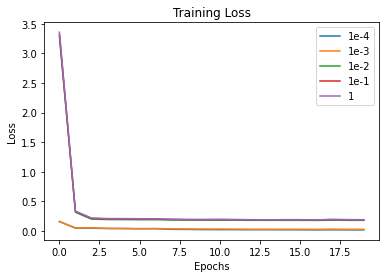

In [18]:
import matplotlib.pyplot as plt

plt.plot(smoothed_training_loss.T)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend(["1e-4", "1e-3", "1e-2", "1e-1", "1"])

# save to the material folder
plt.savefig("material/training_loss.png", dpi=1000)
plt.show()

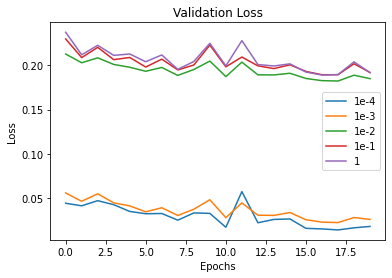

In [19]:
plt.plot(smoothed_valid_loss.T)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss")
plt.legend(["1e-4", "1e-3", "1e-2", "1e-1", "1"])

# save to the material folder in a 1000x1000 resolution
plt.savefig("material/validation_loss.png", dpi=1000)
plt.show()

## Experiment 2: Determine the effectiveness of batchnorm

In [4]:
import numpy as np

import torch

from torch import nn

import torch.nn.functional as F


class DoubleConv(nn.Module):
    """Double Conv class"""

    def __init__(
        self, in_channels: int, out_channels: int, downsample: bool = True
    ) -> None:
        """Constructor for the double conv class

        Parameters:
        -----------
            in_channels: int
                number of input channels
            out_channels: int
                number of output channels
        """
        super(DoubleConv, self).__init__()
        self.downsample = downsample
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.ELU(),
            nn.BatchNorm2d(out_channels),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.ELU(),
            nn.BatchNorm2d(out_channels),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass of the double conv layer

        Parameters:
        -----------
            x: torch.Tensor
                input tensor

        Returns:
        --------
            torch.Tensor:
                output tensor
        """
        x = self.conv(x)

        if self.downsample:
            x = F.max_pool2d(x, 2)

        return x


class UpSample(nn.Module):
    """UpSample class"""

    def __init__(
        self, in_channels: int, out_channels: int, use_conv_transpose: bool = False
    ) -> None:
        """Constructor for the UpSample class

        Parameters:
        -----------
            in_channels: int
                number of input channels
            out_channels: int
                number of output channels
            use_conv_transpose: bool
                whether to use transpose convolution or not
        """
        super(UpSample, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.use_conv_transpose = use_conv_transpose

        if self.use_conv_transpose:
            self.tconv = nn.Sequential(
                nn.ConvTranspose2d(
                    self.in_channels, self.out_channels, kernel_size=2, stride=2
                ),
                nn.BatchNorm2d(self.out_channels),
                nn.ReLU(),
                nn.Conv2d(self.out_channels, self.out_channels, 3, padding=1),
                nn.BatchNorm2d(self.out_channels),
                nn.ReLU(),
            )
        else:
            self.up = nn.Sequential(
                nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True),
                DoubleConv(self.in_channels, self.out_channels, downsample=False),
            )

    def forward(self, x_prev: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
        """Forward pass of the UpSample class

        Parameters:
        -----------
            x_prev: torch.Tensor
                input tensor from the previous layer
            x: torch.Tensor
                input tensor from the skip connection

        Returns:
        --------
            torch.Tensor:
                output tensor
        """
        if self.use_conv_transpose:
            x_prev = self.tconv(x_prev)
        else:
            x_prev = self.up(x_prev)

        # pad x_prev to match x
        diff_h = x_prev.size()[2] - x.size()[2]
        diff_w = x_prev.size()[3] - x.size()[3]
        x = F.pad(
            x,
            [diff_w // 2, diff_w - diff_w // 2, diff_h // 2, diff_h - diff_h // 2],
        )
        return x_prev + x


class DepthNet(nn.Module):
    def __init__(
        self, in_channels, init_weights: bool = True, use_transpose_conv: bool = False
    ) -> None:
        super().__init__()
        # downsampling
        self.downsample1 = DoubleConv(in_channels, 64)
        self.downsample2 = DoubleConv(64, 128)
        self.downsample3 = DoubleConv(128, 256)
        self.downsample4 = DoubleConv(256, 512)
        # upsampling
        self.upsample1 = UpSample(512, 256, use_transpose_conv)
        self.upsample2 = UpSample(256, 128, use_transpose_conv)
        self.upsample3 = UpSample(128, 64, use_transpose_conv)
        self.upsample4 = UpSample(64, 64, use_transpose_conv)
        # 1x1 convolution
        self.conv = nn.Conv2d(64, 1, 1)

        if init_weights:
            self.initialize_weights()

    def initialize_weights(self) -> None:
        """Iniitializes the weights of the network according to the Kaiming uniform distribution
        to avoid vanishing or exploding gradients by keeping the mean of the activations around 0 and the variance around 1
        """
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
                # kaiming initialization
                nn.init.kaiming_uniform_(m.weight)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # downsampling
        x1 = self.downsample1(x)
        del x
        x2 = self.downsample2(x1)
        x3 = self.downsample3(x2)
        x4 = self.downsample4(x3)
        # upsampling
        x_prev = self.upsample1(x4, x3)
        del x4
        x_prev = self.upsample2(
            x_prev,
            x2,
        )
        del x2
        x_prev = self.upsample3(x_prev, x1)
        x_prev = self.upsample4(x_prev, x1)
        del x1
        # 1x1 convolution
        x_prev = (
            F.relu(self.conv(x_prev + 1e-3)) + 1e-6
        )  # add small value to avoid log(0)

        return x_prev

In [25]:
model = DepthNet(4, use_transpose_conv=False)
print(model)

DepthNet(
  (downsample1): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ELU(alpha=1.0)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ELU(alpha=1.0)
      (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (downsample2): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ELU(alpha=1.0)
      (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ELU(alpha=1.0)
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (downsample3): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(128, 256, ker

In [26]:
from torch.optim.lr_scheduler import ExponentialLR

from criterions import DepthLoss

optimizer = Adam(model.parameters(), lr=1e-3)
criterion = DepthLoss()

inputs = {
    "model": model,
    "criterion": criterion,
    "optimizer": optimizer,
    "trainloader": trainloader,
    "validloader": validloader,
    "epochs": 30,
    "device": "cuda",
    "verbose": False,
    "scheduler": ExponentialLR(optimizer, gamma=0.99),
    "training_losses": [0] * 30,
    "validation_losses": [0] * 30,
    # "pretrained_model":"best_model_log_mse.pth"
}

In [27]:
train(**inputs)

Training on cuda...


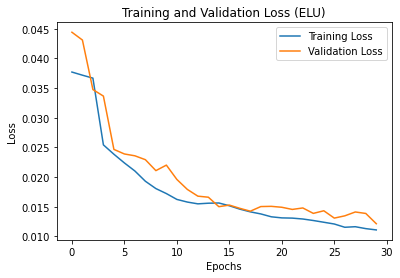

In [21]:
import matplotlib.pyplot as plt

# smooth training and validation losses
smoothed_training_loss_elu = smooth_loss(np.array(inputs["training_losses"]))
smoothed_valid_loss_elu = smooth_loss(np.array(inputs["validation_losses"]))

# plot training and validation losses
plt.plot(smoothed_training_loss_elu, label="Training Loss")
plt.plot(smoothed_valid_loss_elu, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (ELU)")
plt.legend()
plt.savefig("material/training_and_validation_loss_elu.png", dpi=1000)
plt.show()

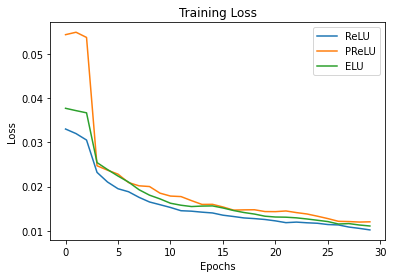

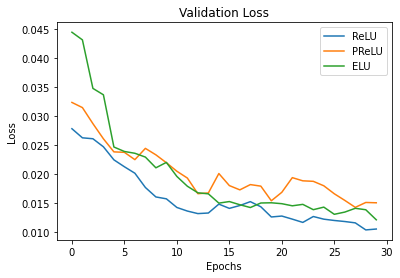

In [22]:
# plot relu and prelu training and validation losses
plt.plot(smoothed_training_loss_relu, label="ReLU")
plt.plot(smoothed_training_loss_prelu, label="PReLU")
plt.plot(smoothed_training_loss_elu, label="ELU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.savefig("material/training_loss_relu_vs_prelu_vs_elu.png", dpi=1000)
plt.show()

# plot relu and prelu training and validation losses
plt.plot(smoothed_valid_loss_relu, label="ReLU") 
plt.plot(smoothed_valid_loss_prelu, label="PReLU")
plt.plot(smoothed_valid_loss_elu, label="ELU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss")
plt.legend()
plt.savefig("material/validation_loss_relu_vs_prelu_vs_elu.png", dpi=1000)
plt.show()

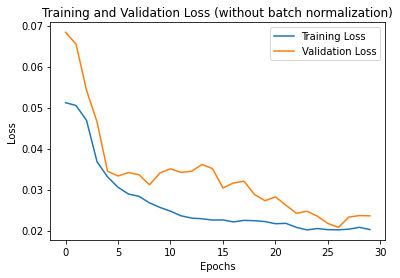

In [12]:
import matplotlib.pyplot as plt

# smooth training and validation losses
smoothed_training_loss_wo_bn = smooth_loss(np.array(inputs["training_losses"]))
smoothed_valid_loss_wo_bn    = smooth_loss(np.array(inputs["validation_losses"]))

# plot training and validation losses
plt.plot(smoothed_training_loss_wo_bn, label="Training Loss")
plt.plot(smoothed_valid_loss_wo_bn, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (without batch normalization)")
plt.legend()
plt.savefig("material/training_and_validation_loss_wo_bn.png", dpi=1000)
plt.show()

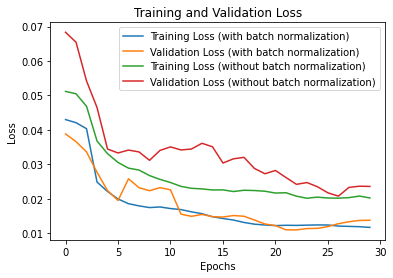

In [18]:
# plot training and validation losses with and without batch normalization
plt.plot(smoothed_training_loss_bn, label="Training Loss (with batch normalization)")
plt.plot(smoothed_valid_loss_bn, label="Validation Loss (with batch normalization)")
plt.plot(smoothed_training_loss_wo_bn, label="Training Loss (without batch normalization)")
plt.plot(smoothed_valid_loss_wo_bn, label="Validation Loss (without batch normalization)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.savefig("material/training_and_validation_loss_bn_exp.png", dpi=1000)
plt.show()

###  Test Model with transpose_conv and without

In [7]:
from torch.optim.lr_scheduler import ExponentialLR

from criterions import DepthLoss

models = [DepthNet(4, use_transpose_conv=False), DepthNet(4, use_transpose_conv=True)]
criterion = DepthLoss()

inputs = {
    "criterion": criterion,
    "trainloader": trainloader,
    "validloader": validloader,
    "epochs": 30,
    "device": "cuda",
    "verbose": False,
    "training_losses": [0] * 30,
    "validation_losses": [0] * 30,
    # "pretrained_model":"best_model_log_mse.pth"
}

train_losses_matrix = np.zeros((len(models), 30))
valid_losses_matrix = np.zeros((len(models), 30))

for idx, model in enumerate(models):
    inputs["model"] = model
    inputs['optimizer'] = Adam(model.parameters(), lr=1e-3)
    inputs['scheduler'] = ExponentialLR(inputs['optimizer'], gamma=0.99)
    
    train(**inputs)
    
    train_losses_matrix[idx, :] = inputs["training_losses"]
    valid_losses_matrix[idx, :] = inputs["validation_losses"]

Training on cuda...


Validating: 100%|██████████| 13/13 [00:25<00:00,  1.99s/it]


Epoch: 1/30.. Training Loss: 0.085996.. Validation Loss: 0.025961
loss decreased from inf to 0.025961 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]


Epoch: 2/30.. Training Loss: 0.030304.. Validation Loss: 0.034016


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]


Epoch: 3/30.. Training Loss: 0.031177.. Validation Loss: 0.036084


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]


Epoch: 4/30.. Training Loss: 0.027039.. Validation Loss: 0.027692


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


Epoch: 5/30.. Training Loss: 0.025680.. Validation Loss: 0.032013


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]


Epoch: 6/30.. Training Loss: 0.023033.. Validation Loss: 0.031078


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


Epoch: 7/30.. Training Loss: 0.024293.. Validation Loss: 0.038624


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]


Epoch: 8/30.. Training Loss: 0.022815.. Validation Loss: 0.019187
loss decreased from 0.025961 to 0.019187 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


Epoch: 9/30.. Training Loss: 0.020512.. Validation Loss: 0.016302
loss decreased from 0.019187 to 0.016302 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]


Epoch: 10/30.. Training Loss: 0.020400.. Validation Loss: 0.018268


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]


Epoch: 11/30.. Training Loss: 0.020669.. Validation Loss: 0.022789


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]


Epoch: 12/30.. Training Loss: 0.018515.. Validation Loss: 0.016396


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]


Epoch: 13/30.. Training Loss: 0.020582.. Validation Loss: 0.019262


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]


Epoch: 14/30.. Training Loss: 0.021042.. Validation Loss: 0.016604


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


Epoch: 15/30.. Training Loss: 0.016649.. Validation Loss: 0.017578


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]


Epoch: 16/30.. Training Loss: 0.015965.. Validation Loss: 0.015558
loss decreased from 0.016302 to 0.015558 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]


Epoch: 17/30.. Training Loss: 0.017302.. Validation Loss: 0.016312


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]


Epoch: 18/30.. Training Loss: 0.017548.. Validation Loss: 0.017437


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]


Epoch: 19/30.. Training Loss: 0.016428.. Validation Loss: 0.015321
loss decreased from 0.015558 to 0.015321 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]


Epoch: 20/30.. Training Loss: 0.017412.. Validation Loss: 0.020617


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


Epoch: 21/30.. Training Loss: 0.015938.. Validation Loss: 0.020414


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]


Epoch: 22/30.. Training Loss: 0.016281.. Validation Loss: 0.022114


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]


Epoch: 23/30.. Training Loss: 0.016567.. Validation Loss: 0.016228


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]


Epoch: 24/30.. Training Loss: 0.016178.. Validation Loss: 0.013966
loss decreased from 0.015321 to 0.013966 -> saving best model.


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]


Epoch: 25/30.. Training Loss: 0.016922.. Validation Loss: 0.024898


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]


Epoch: 26/30.. Training Loss: 0.015914.. Validation Loss: 0.013544
loss decreased from 0.013966 to 0.013544 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]


Epoch: 27/30.. Training Loss: 0.014379.. Validation Loss: 0.015382


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]


Epoch: 28/30.. Training Loss: 0.016358.. Validation Loss: 0.014240


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]


Epoch: 29/30.. Training Loss: 0.014569.. Validation Loss: 0.016924


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]


Epoch: 30/30.. Training Loss: 0.014886.. Validation Loss: 0.015415
Training on cuda...


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


Epoch: 1/30.. Training Loss: 0.168979.. Validation Loss: 0.087679
loss decreased from inf to 0.087679 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]


Epoch: 2/30.. Training Loss: 0.031277.. Validation Loss: 0.028566
loss decreased from 0.087679 to 0.028566 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]


Epoch: 3/30.. Training Loss: 0.027674.. Validation Loss: 0.022919
loss decreased from 0.028566 to 0.022919 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]


Epoch: 4/30.. Training Loss: 0.024487.. Validation Loss: 0.020237
loss decreased from 0.022919 to 0.020237 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]


Epoch: 5/30.. Training Loss: 0.023586.. Validation Loss: 0.026791


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]


Epoch: 6/30.. Training Loss: 0.020839.. Validation Loss: 0.035884


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]


Epoch: 7/30.. Training Loss: 0.020860.. Validation Loss: 0.030905


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]


Epoch: 8/30.. Training Loss: 0.019740.. Validation Loss: 0.032026


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]


Epoch: 9/30.. Training Loss: 0.017531.. Validation Loss: 0.016644
loss decreased from 0.020237 to 0.016644 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]


Epoch: 10/30.. Training Loss: 0.018613.. Validation Loss: 0.021332


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]


Epoch: 11/30.. Training Loss: 0.015897.. Validation Loss: 0.026918


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]


Epoch: 12/30.. Training Loss: 0.017177.. Validation Loss: 0.034619


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]


Epoch: 13/30.. Training Loss: 0.015569.. Validation Loss: 0.021215


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]


Epoch: 14/30.. Training Loss: 0.016032.. Validation Loss: 0.014537
loss decreased from 0.016644 to 0.014537 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]


Epoch: 15/30.. Training Loss: 0.014468.. Validation Loss: 0.013536
loss decreased from 0.014537 to 0.013536 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]


Epoch: 16/30.. Training Loss: 0.015963.. Validation Loss: 0.013911


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]


Epoch: 17/30.. Training Loss: 0.014749.. Validation Loss: 0.012616
loss decreased from 0.013536 to 0.012616 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]


Epoch: 18/30.. Training Loss: 0.014088.. Validation Loss: 0.014000


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]


Epoch: 19/30.. Training Loss: 0.012681.. Validation Loss: 0.014638


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]


Epoch: 20/30.. Training Loss: 0.012281.. Validation Loss: 0.018703


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]


Epoch: 21/30.. Training Loss: 0.012310.. Validation Loss: 0.013397


Validating: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]


Epoch: 22/30.. Training Loss: 0.013133.. Validation Loss: 0.015456


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]


Epoch: 23/30.. Training Loss: 0.011829.. Validation Loss: 0.018364


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]


Epoch: 24/30.. Training Loss: 0.012033.. Validation Loss: 0.017155


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]


Epoch: 25/30.. Training Loss: 0.012583.. Validation Loss: 0.013550


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]


Epoch: 26/30.. Training Loss: 0.012300.. Validation Loss: 0.016804


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]


Epoch: 27/30.. Training Loss: 0.012195.. Validation Loss: 0.013346


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]


Epoch: 28/30.. Training Loss: 0.011281.. Validation Loss: 0.010015
loss decreased from 0.012616 to 0.010015 -> saving best model.


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]


Epoch: 29/30.. Training Loss: 0.011449.. Validation Loss: 0.011147


Validating: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]


Epoch: 30/30.. Training Loss: 0.010587.. Validation Loss: 0.009579
loss decreased from 0.010015 to 0.009579 -> saving best model.


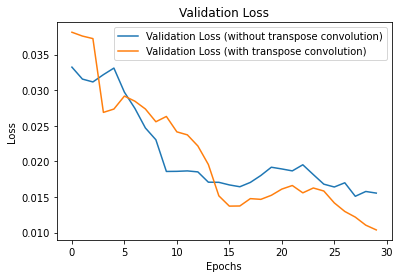

In [13]:
import matplotlib.pyplot as plt
# plot training and validation losses of using transpose convolution vs not using transpose convolution
# plt.plot(smooth_loss(train_losses_matrix[0, :]), label="Training Loss (without transpose convolution)")
plt.plot(smooth_loss(valid_losses_matrix[0, :]), label="Validation Loss (without transpose convolution)")
# plt.plot(smooth_loss(train_losses_matrix[1, :]), label="Training Loss (with transpose convolution)")
plt.plot(smooth_loss(valid_losses_matrix[1, :]), label="Validation Loss (with transpose convolution)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss")
plt.legend()
plt.savefig("material/validation_loss_transpose_conv_vs_upsampling.png", dpi=1000)
plt.show()